In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMG_SIZE=224
BATCH_SIZE=32


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [6]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='training')

Found 915 images belonging to 2 classes.


In [7]:
val_genearator=train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='binary',subset='validation')

Found 227 images belonging to 2 classes.


In [12]:
model=keras.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
layers.MaxPooling2D((2,2)),layers.Conv2D(64,(3,3),activation='relu'),layers.MaxPooling2D((2,2)),layers.Conv2D(128,(3,3),activation='relu'),layers.MaxPooling2D((2,2)),
layers.Flatten(),layers.Dense(128,activation='relu'),layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(train_generator,epochs=5,validation_data=val_genearator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6000 - loss: 1.1251

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 206s 7s/step - accuracy: 0.6017 - loss: 1.1133 - val_accuracy: 0.7004 - val_loss: 0.5595
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.7902 - loss: 0.4291 - val_accuracy: 0.7489 - val_loss: 0.4913
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.8504 - loss: 0.3417 - val_accuracy: 0.7709 - val_loss: 0.4451
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.9036 - loss: 0.2602 - val_accuracy: 0.8106 - val_loss: 0.3933
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.9149 - loss: 0.2039 - val_accuracy: 0.8634 - val_loss: 0.2856


In [16]:
model.save('/content/drive/MyDrive/brain_tumor_model/brain_tumor_ml.h5')

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model =load_model('/content/drive/MyDrive/brain_tumor_model/brain_tumor_ml.h5')
print("Model Loaded")

Model Loaded


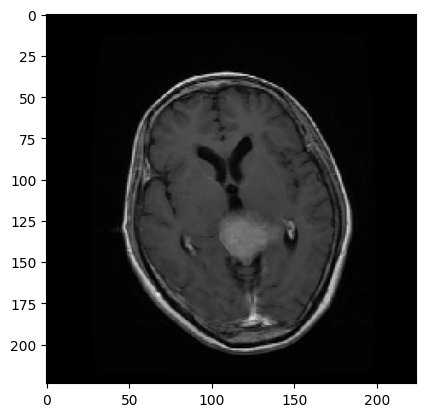

In [21]:
test_image_path="/content/drive/MyDrive/brain_tumor_dataset/yes/Y1717.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [23]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("Tumor Detected")
else:
    print("No Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Tumor Detected


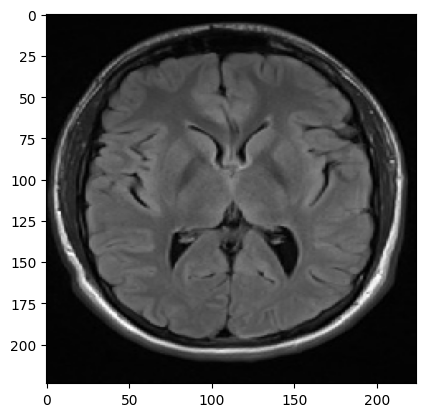

In [24]:
test_image_path="/content/drive/MyDrive/brain_tumor_dataset/no/N1435.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [26]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.
prediction = model.predict(img_array)
if prediction[0][0] < 0.5:
    print("Tumor Detected")
else:
    print("No Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
No Tumor Detected
